Import packages and functions

In [1]:
import sys
sys.path.append('../../../')


In [2]:
from scripts.forecast import DataGenerator, make_photoz_bin_edges, compare_fisher_matrices 
from scripts.luminosity_functions import def_agn_xlf
import matplotlib
from scripts.utils import np, plt, set_mpl
set_mpl()
%matplotlib inline


Set up parameters of AGN population

In [5]:
fiducial_params = {'Omega_c': 0.25, 'Omega_b': 0.05,
                   'h': 0.7, 'sigma8': 0.8, 'n_s': 0.96,
                   'transfer_function': 'boltzmann_camb',
                   'baryons_power_spectrum': 'nobaryons',
                   'matter_power_spectrum': 'linear'}

fsky = 0.658
powspec_pars_dict_agn = {
    'slim': 1e-14,
    'l_min': 10,
    'l_max': 500,
    'log_bins': 41,
    'fsky': fsky,
    'has_rsd': True,
    'density_multiplier': 1.3,
    'camb_llimber': 110,
    'xlf': def_agn_xlf,
    'use_camb': True,
    'delta_i': 3,
    'remove_ignored_cells': True,
}



zmin_agn = 0.5
zmax_agn = 2.5
sigma0_agn = 0.05
f_fail_agn = 0.02
bins_agn = make_photoz_bin_edges(zmin_agn, zmax_agn, k=1, sigma_0=sigma0_agn)

powspec_pars_dict_agn['sigma_0'] = sigma0_agn
powspec_pars_dict_agn['f_fail'] = f_fail_agn

Run DataGenerator object to generate dndz, Cell, etc

Total AGN sources: 1964808 at fsky=0.658[27144 deg^2]
Photo-z parameters: self.sigma_0=0.05, self.f_fail=0.02
calculating CAMB...
CAMB calculation time: 1.1716721057891846


calc Covariance: 100%|██████████| 171/171 [00:00<00:00, 761.22it/s]


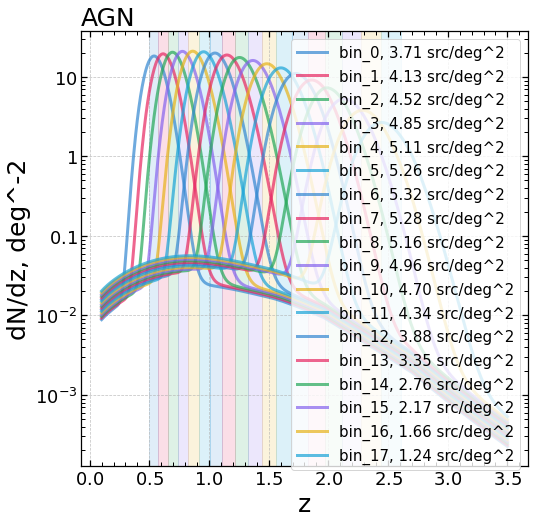

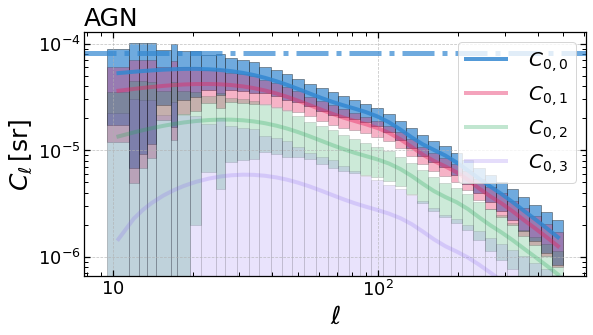

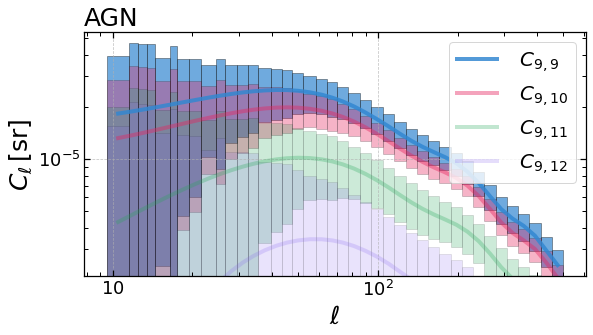

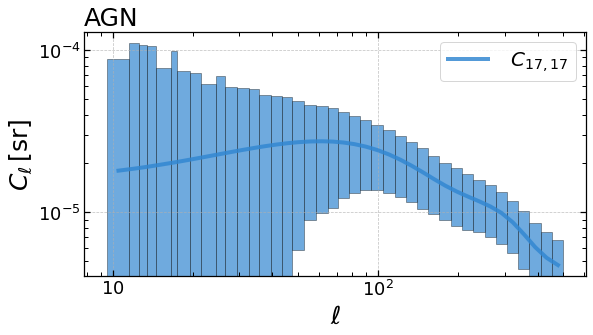

In [10]:
datagen_AGN = DataGenerator(
                                 fiducial_params=fiducial_params, set_name = 'AGN')

datagen_AGN.invoke(**powspec_pars_dict_agn, bin_left_edges=bins_agn, plot_dndz=True, plot_cell=True);
datagen_AGN.invert_cov();

In [11]:
datagen_AGN.cov_rebin_lkl.shape

(2640, 2640)

Calculate the Fisher matrix

In [8]:
F = datagen_AGN.get_Fisher_matrix(jac_step = 0.001, jac_order = 2)[0]

Start Jacobian calculation (cosmological part): jac_step=0.001, jac_order=2
Finished Jacobian calculation (cosmological part) in 16.37 seconds


Plot the Fisher matrix


AGN
FoM: 2.8e+09
Omega_c: 0.250 +- 0.025 (10.2 %)
Omega_b: 0.050 +- 0.021 (41.8 %)
h: 0.700 +- 0.256 (36.6 %)
n_s: 0.960 +- 0.163 (16.9 %)
sigma_8: 0.800 +- 0.009 (1.1 %)
-------


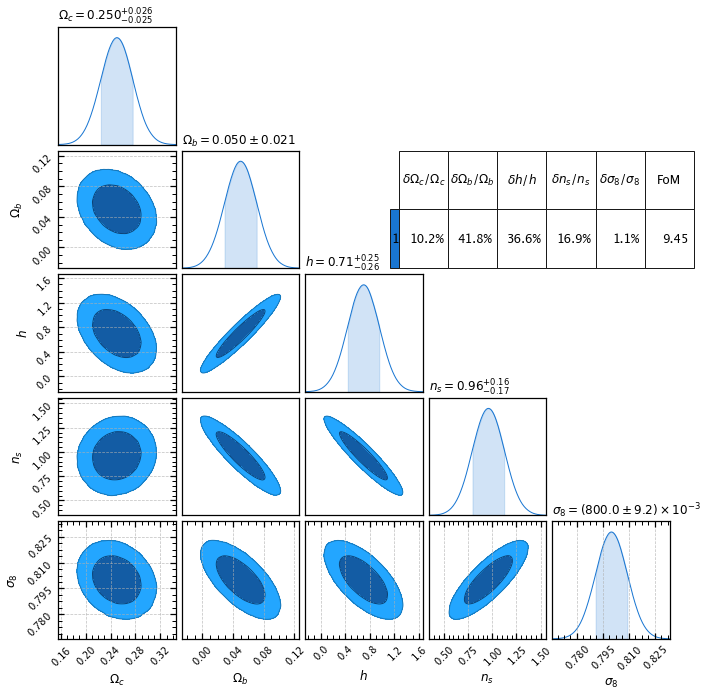

In [16]:
compare_fisher_matrices([F]);